In [230]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import torch as th
import matplotlib.pyplot as plt
from aimanager.utils.utils import make_dir, load_yaml
from aimanager.utils.array_to_df import using_multiindex, add_labels
from aimanager.utils.merge import merge_files_by_name

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})


run = 'dev'

folder = f'../../data/manager_v3/{run}'

train_folder = os.path.join(folder, 'metrics')
model_folder = os.path.join(folder, 'model')
merge_file = os.path.join(folder, 'metrics.parquet')

plot_folder = f'plots/{run}'

make_dir(plot_folder)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [231]:
dfs = [pd.read_parquet(os.path.join(train_folder, file)) for file in os.listdir(train_folder)]
df = pd.concat(dfs)

In [232]:
df.columns

Index(['job_id', 'round_number', 'sampling', 'update_step', 'metric', 'value'], dtype='object')

In [233]:
non_labels = ['round_number', 'sampling', 'update_step', 'metric', 'value', 'job_id']

labels = [c for c in df.columns if c not in non_labels]


In [234]:
df['metric'].unique()

array(['punishments', 'contributions', 'common_good',
       'contributor_payoff', 'manager_payoff', 'next_reward', 'q_min',
       'q_max', 'q_mean', 'loss'], dtype=object)

In [235]:
df['sampling'].unique()

array(['eps-greedy', 'greedy'], dtype=object)

In [236]:
df['sampling'].unique()

array(['eps-greedy', 'greedy'], dtype=object)

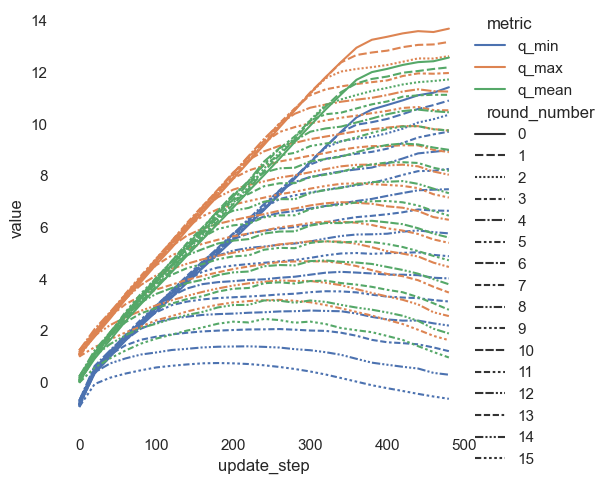

In [237]:
selection = {'metric': 'next_reward', 'sampling': 'eps-greedy'}

focus = ['update_step', 'metric', 'round_number']

w = pd.concat(
    (df[k] == v
    for k,v in selection.items() if k not in focus
    ), axis=1
).all(1)
dfs = df[w].reset_index(drop=True).copy()

w = dfs['metric'].isin(['q_min', 'q_max', 'q_mean'])
dfs = dfs[w]

fg = sns.relplot(
    data=dfs, 
    y='value',
    x=focus[0] if len(focus) >= 1 else None, 
    hue=focus[1] if len(focus) >= 2 else None,
    style=focus[2] if len(focus) >= 3 else None,
    col=focus[3] if len(focus) >= 4 else None, 
    row=focus[4] if len(focus) >= 5 else None, 
    kind='line', ci=None)

fg.savefig(os.path.join(plot_folder, 'q_values.jpg'))

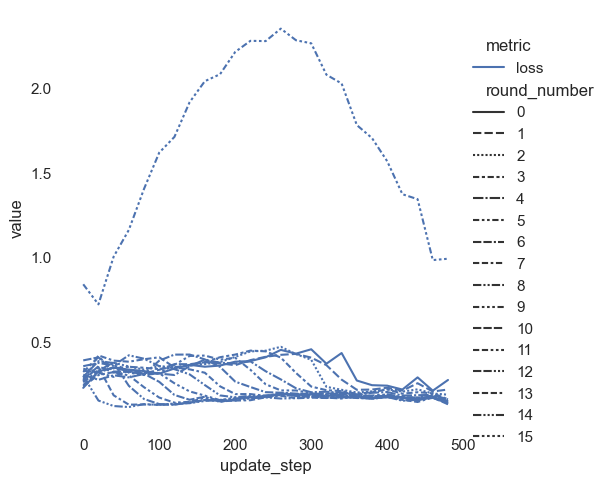

In [238]:
selection = {'metric': 'next_reward', 'sampling': 'eps-greedy'}

focus = ['update_step', 'metric', 'round_number']

w = pd.concat(
    (df[k] == v
    for k,v in selection.items() if k not in focus
    ), axis=1
).all(1)
dfs = df[w].reset_index(drop=True).copy()

w = dfs['metric'].isin(['loss'])
dfs = dfs[w]

fg = sns.relplot(
    data=dfs, 
    y='value',
    x=focus[0] if len(focus) >= 1 else None, 
    hue=focus[1] if len(focus) >= 2 else None,
    style=focus[2] if len(focus) >= 3 else None,
    col=focus[3] if len(focus) >= 4 else None, 
    row=focus[4] if len(focus) >= 5 else None, 
    kind='line', ci=None)

fg.savefig(os.path.join(plot_folder, 'q_values.jpg'))

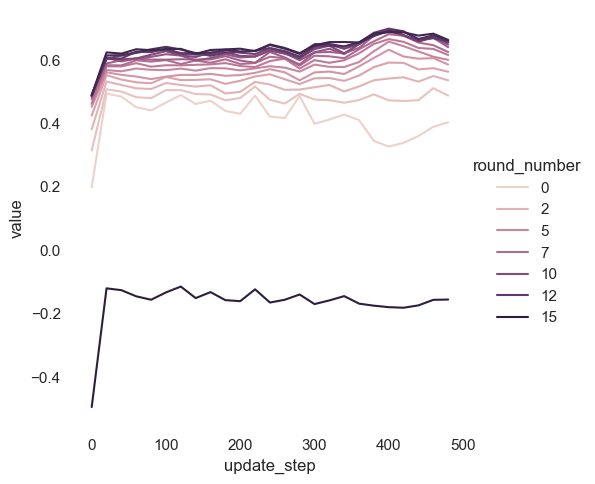

In [239]:
selection = {'metric': 'next_reward', 'sampling': 'eps-greedy'}

focus = ['update_step', 'round_number']

w = pd.concat(
    (df[k] == v
    for k,v in selection.items() if k not in focus
    ), axis=1
).all(1)
dfs = df[w].reset_index(drop=True).copy()

# w = dfs['metric'].isin(['loss'])
# dfs = dfs[w]

fg = sns.relplot(
    data=dfs, 
    y='value',
    x=focus[0] if len(focus) >= 1 else None, 
    hue=focus[1] if len(focus) >= 2 else None,
    style=focus[2] if len(focus) >= 3 else None,
    col=focus[3] if len(focus) >= 4 else None, 
    row=focus[4] if len(focus) >= 5 else None, 
    kind='line', ci=None)

fg.savefig(os.path.join(plot_folder, 'q_values.jpg'))

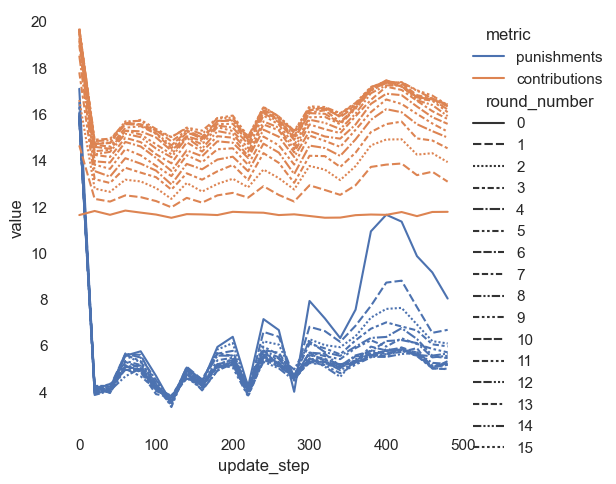

In [240]:
selection = {'metric': 'next_reward', 'sampling': 'eps-greedy'}

focus = ['update_step', 'metric', 'round_number']

w = pd.concat(
    (df[k] == v
    for k,v in selection.items() if k not in focus
    ), axis=1
).all(1)
dfs = df[w].reset_index(drop=True).copy()

w = dfs['metric'].isin(['contributions', 'punishments'])
dfs = dfs[w]

fg = sns.relplot(
    data=dfs, 
    y='value',
    x=focus[0] if len(focus) >= 1 else None, 
    hue=focus[1] if len(focus) >= 2 else None,
    style=focus[2] if len(focus) >= 3 else None,
    col=focus[3] if len(focus) >= 4 else None, 
    row=focus[4] if len(focus) >= 5 else None, 
    kind='line', ci=None)

fg.savefig(os.path.join(plot_folder, 'q_values.jpg'))

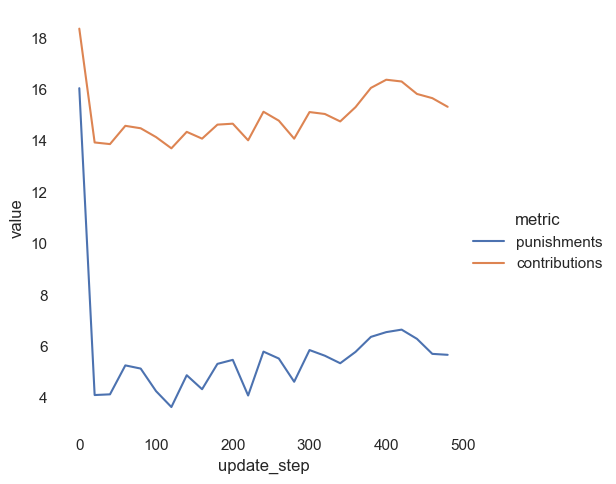

In [241]:
selection = {'metric': 'next_reward', 'sampling': 'eps-greedy'}

focus = ['update_step', 'metric']

w = pd.concat(
    (df[k] == v
    for k,v in selection.items() if k not in focus
    ), axis=1
).all(1)
dfs = df[w].reset_index(drop=True).copy()

w = dfs['metric'].isin(['contributions', 'punishments'])
dfs = dfs[w]

fg = sns.relplot(
    data=dfs, 
    y='value',
    x=focus[0] if len(focus) >= 1 else None, 
    hue=focus[1] if len(focus) >= 2 else None,
    style=focus[2] if len(focus) >= 3 else None,
    col=focus[3] if len(focus) >= 4 else None, 
    row=focus[4] if len(focus) >= 5 else None, 
    kind='line', ci=None)

fg.savefig(os.path.join(plot_folder, 'q_values.jpg'))

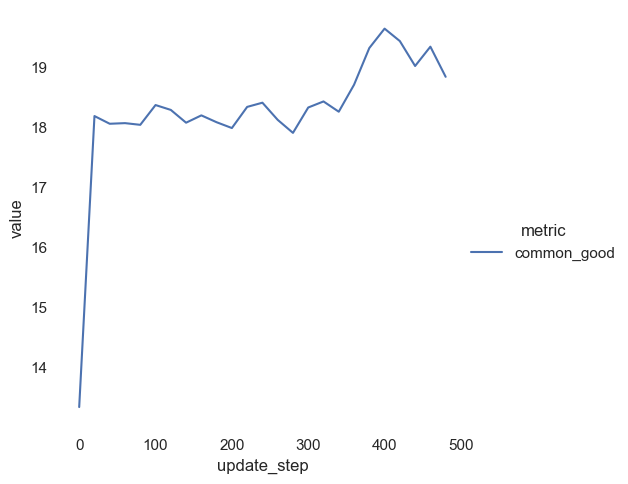

In [242]:
selection = {'metric': 'next_reward', 'sampling': 'eps-greedy'}

focus = ['update_step', 'metric']

w = pd.concat(
    (df[k] == v
    for k,v in selection.items() if k not in focus
    ), axis=1
).all(1)
dfs = df[w].reset_index(drop=True).copy()

w = dfs['metric'].isin(['common_good'])
dfs = dfs[w]

fg = sns.relplot(
    data=dfs, 
    y='value',
    x=focus[0] if len(focus) >= 1 else None, 
    hue=focus[1] if len(focus) >= 2 else None,
    style=focus[2] if len(focus) >= 3 else None,
    col=focus[3] if len(focus) >= 4 else None, 
    row=focus[4] if len(focus) >= 5 else None, 
    kind='line', ci=None)

fg.savefig(os.path.join(plot_folder, 'q_values.jpg'))

In [243]:
import os
import torch as th
import numpy as np
import pandas as pd
from itertools import count
from aimanager.utils.utils import make_dir

from aimanager.manager.environment_v3 import ArtificialHumanEnv
from aimanager.manager.manager import ArtificalManager

device = th.device('cpu')

n_episodes = 1000

class RuleHuman():
    def __init__(self, contribution):
        self.contribution = contribution

    def encode_pure(self, data, **kwargs):
        return data

    def predict_pure(self, data, **kwargs):
        return th.full_like(data['prev_contributions'], fill_value=self.contribution), 


job_id = df.iloc[0]['job_id']
model_file = os.path.join(model_folder, f'{job_id}.pt')
rec_keys = ['punishments', 'contributions', 'common_good', 'contributor_payoff', 'manager_payoff']
metric_list = []

for c in range(0,20):
    human_rule_args = {
        'contribution': c
    }

    ah = RuleHuman(**human_rule_args)
    manager = ArtificalManager.load(model_file, device=device)
    env = ArtificialHumanEnv(
        artifical_humans=ah, default_values=manager.default_values, n_agents=4, n_contributions=21, n_punishments=31, batch_size=n_episodes, n_rounds=16, device=device)

    state = env.reset()
    for round_number in count():
        action = manager.get_punishment(**state, **env.get_batch_structure())
        state = env.punish(action)
        
        metrics = {
            k: state[k].to(th.float).mean().item() for k in rec_keys}
        
        metrics = {**metrics, **human_rule_args, 'manager': job_id}

        # pass actions to environment and advance by one step
        state, reward, done = env.step()

        metrics['next_reward'] = reward.mean().item()
        metrics['round_number'] = round_number
        metric_list.append(metrics)
        # break
        if done:
            break


In [244]:
id_vars = ['round_number', 'manager'] + list(human_rule_args.keys())

dfm = pd.DataFrame.from_records(metric_list)

value_vars = list(set(dfm.columns) - set(id_vars))
dfm = dfm.melt(id_vars=id_vars, value_vars=value_vars, var_name='metric')

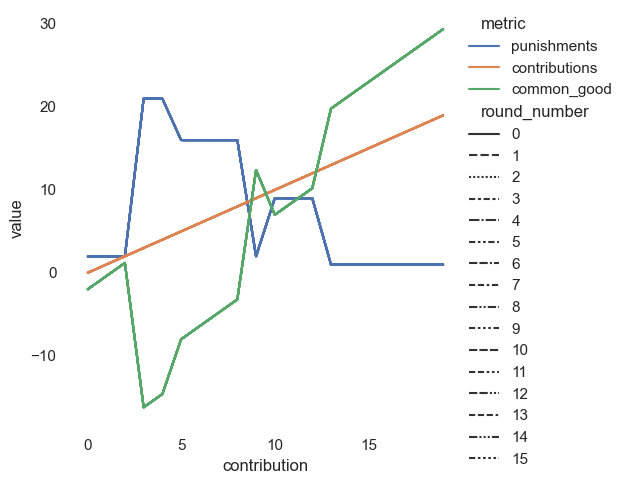

In [245]:
selection = {}

focus = ['contribution', 'metric', 'round_number']

dfs = dfm.copy()

if len(selection):
    w = pd.concat(
        (dfs[k] == v
        for k,v in selection.items() if (k not in focus) and (k in dfs.columns)
        ), axis=1
    ).all(1)
    dfs = dfs[w].reset_index(drop=True).copy()

w = dfs['metric'].isin(['contributions', 'punishments', 'common_good'])
dfs = dfs[w]


fg = sns.relplot(
    data=dfs, 
    y='value',
    x=focus[0] if len(focus) >= 1 else None, 
    hue=focus[1] if len(focus) >= 2 else None,
    style=focus[2] if len(focus) >= 3 else None,
    col=focus[3] if len(focus) >= 4 else None, 
    row=focus[4] if len(focus) >= 5 else None, 
    kind='line', ci=None)

fg.savefig(os.path.join(plot_folder, 'metrics.jpg'))

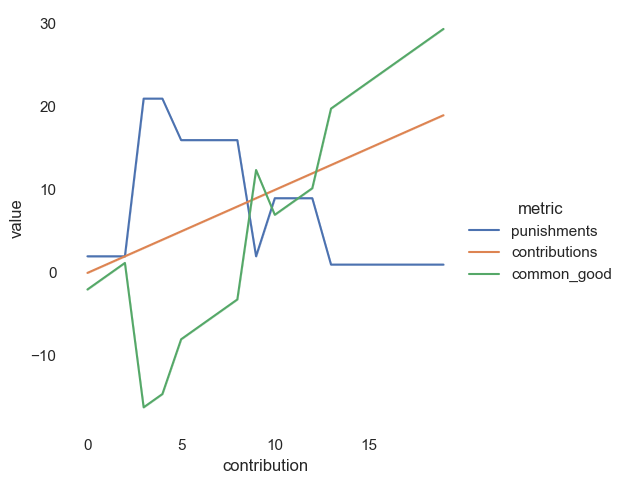

In [246]:
selection = {}

focus = ['contribution', 'metric']

dfs = dfm.copy()

if len(selection):
    w = pd.concat(
        (dfs[k] == v
        for k,v in selection.items() if (k not in focus) and (k in dfs.columns)
        ), axis=1
    ).all(1)
    dfs = dfs[w].reset_index(drop=True).copy()

w = dfs['metric'].isin(['contributions', 'punishments', 'common_good'])
dfs = dfs[w]


fg = sns.relplot(
    data=dfs, 
    y='value',
    x=focus[0] if len(focus) >= 1 else None, 
    hue=focus[1] if len(focus) >= 2 else None,
    style=focus[2] if len(focus) >= 3 else None,
    col=focus[3] if len(focus) >= 4 else None, 
    row=focus[4] if len(focus) >= 5 else None, 
    kind='line')

fg.savefig(os.path.join(plot_folder, 'metrics.jpg'))